In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn import metrics
import time

#Importing Data
data = pd.read_csv("LatestHeartAttack.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Gender                  303 non-null    int64  
 2   Chest_Pain              303 non-null    int64  
 3   Resting_Blood_Pressure  303 non-null    int64  
 4   Cholesterol             303 non-null    int64  
 5   Fasting_Blood_Sugar     303 non-null    int64  
 6   Resting_ECG             303 non-null    int64  
 7   Max_Heart_Rate          303 non-null    int64  
 8   EI_Angina               303 non-null    int64  
 9   Previous_Peak           303 non-null    float64
 10  Slope                   303 non-null    int64  
 11  Major_Vessels           303 non-null    int64  
 12  Thalium_Stress_Test     303 non-null    int64  
 13  Output                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,EI_Angina,Previous_Peak,Slope,Major_Vessels,Thalium_Stress_Test,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The shape of indepedent variables :  (303, 7)
The shape of dependent variable:  (303,)


Maximum accuracy:- 0.8705882352941177 at K = 4
Minimum error:- 0.12941176470588237 at K = 4


K-Value based on Sqroot of sample size of 303
Accuracy of model at K =  17  is 0.8352941176470589


K-Value of  4
Accuracy of model at K =  4  is 0.8588235294117647


K-Value of  5
Accuracy of model at K =  5  is 0.8352941176470589


Accuracy of Train Model is:  0.8761467889908257


Time Taken for training the dataset
Elapsed Time : 0.001996278762817383 seconds


Time Taken for fitting and predicting the model
Elapsed Time : 0.0049991607666015625 seconds


K-Value of  6
Accuracy of model at K =  6  is 0.8352941176470589


Changing number of features
With all features we can get an accuracy of 0.901 - k @ 7) However,Training data is 0.877(overfitting)
with 9 features we can get an accuracy of (0.78 - k @ 2) * Corr Threshold - 0.2
With 7 features we can get an accuracy of (0.857 - k @ 12) * Corr Threshold - 

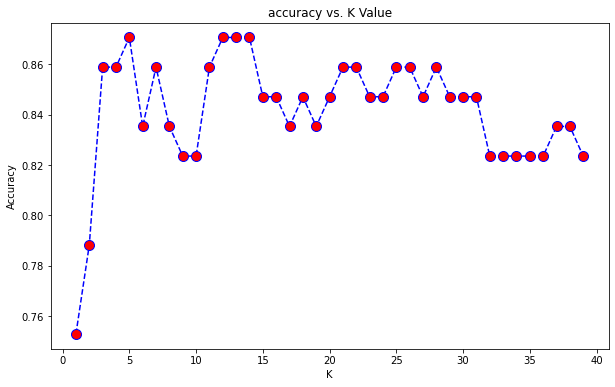

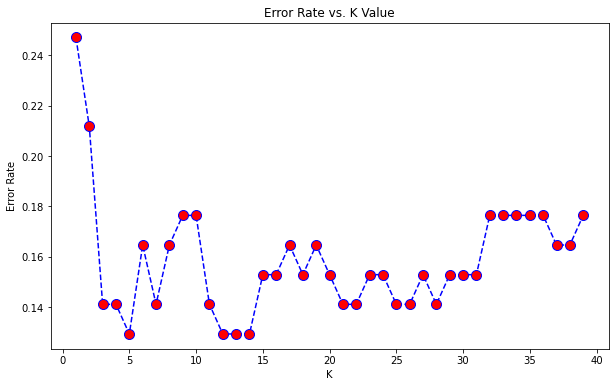

In [39]:
#Extracting data from dataset.
X= data[['Chest_Pain', 'Max_Heart_Rate', 'EI_Angina','Previous_Peak', 'Slope', 'Major_Vessels', 'Thalium_Stress_Test']].values
y= data['Output'].values

#X= data.iloc[:,:-1].values
#y= data.iloc[:,-1].values

print("The shape of indepedent variables : ",X.shape)
print("The shape of dependent variable: ",y.shape)
print('\n')

start = time.time()

#Training the data with random state 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.28, random_state = 42)
end = time.time()
trainElapsed=end-start

#Normalize the data with standard scalar

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Max accuracy == K values
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

#looking for the lowest error rate 

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

print("\n")


#K Value of sqroot of sample size (303)

k = round(math.sqrt(303))
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("K-Value based on Sqroot of sample size of 303")
print("Accuracy of model at K = ",k," is",metrics.accuracy_score(y_test, y_pred))
print('\n')

#K-value of 4
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("K-Value of ", k)
print("Accuracy of model at K = ",k," is",metrics.accuracy_score(y_test, y_pred))
print('\n')

start = time.time()
#K-value of 5
k = 5
knn = KNeighborsClassifier(n_neighbors = k, metric ='chebyshev')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("K-Value of ",k)
print("Accuracy of model at K = ",k," is",metrics.accuracy_score(y_test, y_pred))
print('\n')

end = time.time()
fitElapsed=end-start
#evaluate on train dataset

y_tred = knn.predict(X_train)
print("Accuracy of Train Model is: ", metrics.accuracy_score(y_train,y_tred))
print('\n')

print("Time Taken for training the dataset")
print('Elapsed Time : {0} seconds'.format(trainElapsed))
print('\n')
print("Time Taken for fitting and predicting the model")
print('Elapsed Time : {0} seconds'.format(fitElapsed))
print('\n')

#K-value of 6
k = 6
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
best = metrics.accuracy_score(y_test, y_pred)
print("K-Value of ",k)
print("Accuracy of model at K = ",k," is",best)

print('\n')

print("Changing number of features")
print("With all features we can get an accuracy of 0.901 - k @ 7) However,Training data is 0.877(overfitting)")
print("with 9 features we can get an accuracy of (0.78 - k @ 2) * Corr Threshold - 0.2")
print("With 7 features we can get an accuracy of (0.857 - k @ 12) * Corr Threshold - 0.3")
print("With 5 features we can get an accuracy of 0.57 - k @ 7 * Corr Threshold - 0.35")
print("With 4 features we can get an accuracy of 0.80 - k @ 9) * Corr Threshold - 0.4")
print("\n")
print("Changing the Test_size on TTS(train_test_split), with 7 features")
print("test_size = 0.3, test accuracy = 86.8%, training accuracy of = 82.1%")
print("test_size = 0.25, test accuracy = 89.5%, training accuracy of = 86.3%")
print("test_size = 0.2, test accuracy = 90.2%, training accuracy of = 80.99%")

#Test size of 0.25 gives the less differences between test and training accuracy . so its much more balanced
#compared to the others. 